In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [3]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.test == 1]))
print('control sample size:', len(experiment_data[experiment_data.test == 0]))
print('test proportion:', experiment_data.test.mean())
print()

# What is the signup rate of test and control?
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())

# Is the experiment already significant?
stats.ttest_ind(
    experiment_data[experiment_data.test == 1].is_signed_up,
    experiment_data[experiment_data.test == 0].is_signed_up)

test sample size: 19861
control sample size: 46867
test proportion: 0.2976411701234864

test signup rate: 0.2421328231206888
control signup rate: 0.19937269293959503


Ttest_indResult(statistic=12.368130184147793, pvalue=4.2481677149116848e-35)

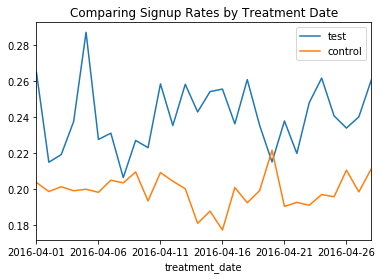

T-Test Results by Date
Ttest_indResult(statistic=2.1093247972206348, pvalue=0.035033626702704962)
Ttest_indResult(statistic=0.61925009662926112, pvalue=0.53580745887082648)
Ttest_indResult(statistic=0.5679550900332947, pvalue=0.57012796637613361)
Ttest_indResult(statistic=1.6188051066317655, pvalue=0.1055969402778888)
Ttest_indResult(statistic=2.8685447266859416, pvalue=0.0041648324956540519)
Ttest_indResult(statistic=0.96535203316302998, pvalue=0.33447754270147856)
Ttest_indResult(statistic=1.0646969669150483, pvalue=0.28709931369215452)
Ttest_indResult(statistic=0.10372657556539404, pvalue=0.91739628812671059)
Ttest_indResult(statistic=0.71098755320227125, pvalue=0.47714757325564261)
Ttest_indResult(statistic=1.234910031428132, pvalue=0.2169634842483128)
Ttest_indResult(statistic=1.7524585316828551, pvalue=0.079827142696463071)
Ttest_indResult(statistic=1.0772576129054874, pvalue=0.28148839695537731)
Ttest_indResult(statistic=1.9956610823589083, pvalue=0.046093372990527584)
Ttest_ind

In [4]:
fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))